In [2]:
import pandas as pd

In [52]:
#문제 1 application_recode.csv와 credit_record.csv를 appli과 cred에 데이터프레임으로 
appli = pd.read_csv('./application_record.csv')
cred = pd.read_csv('./credit_record.csv')

In [53]:
# 문제 2:appli과 cred의 행과 열의 길이를 출력하세요
print("appli:", appli.shape)
print("cred:", cred.shape)


appli: (438557, 18)
cred: (1048575, 3)


In [75]:
cred.STATUS= cred.STATUS.replace("X", 0)
cred.STATUS= cred.STATUS.replace("X", 0)

Signature:
cred.rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level' = None,
    errors: 'IgnoreRaise' = 'ignore',
) -> 'DataFrame | None'
Docstring:
Rename columns or index labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or function transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
    Alternative to sp

In [56]:
#문제3: appli의 결측치를 확인하고 있다면 해당 열(colume)을 삭제하세요
print(appli.isna().sum())
# del appli["OCCUPATION_TYPE"]
print(appli.NAME_HOUSING_TYPE.value_counts().sum())
print(cred.ID.value_counts().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64
438557
1048575


In [47]:
#문제4: applie과 cred를 id를 기준으로 합쳐서 df라는 하나의 데이터 프레임으로 만드세요
df = pd.merge(appli, cred, how="left", on="ID")
# df = pd.merge(appli, cred, how="inner", on="ID")
# test= pd.concat([appli,cred],axis=0)
# test.head()
# test.isna().sum()
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
CNT_FAM_MEMBERS             0
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64

In [13]:
# 문제5: NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYP 열의 고유한 데이터의 수를 출력하세요
# 오타있음 NAME_HOUSING_TYP
pd.DataFrame(df[["NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"]].value_counts())

count
NAME_EDUCATION_TYPE           NAME_FAMILY_STATUS   NAME_HOUSING_TYPE          
Secondary / secondary special Married              House / apartment    333142
Higher education              Married              House / apartment    138647
Secondary / secondary special Single / not married House / apartment     49721
                              Civil marriage       House / apartment     38445
                              Separated            House / apartment     26775
...                                                                        ...
Lower secondary               Civil marriage       Municipal apartment      18
                              Single / not married Rented apartment         16
                              Widow                Municipal apartment      15
Incomplete higher             Separated            Rented apartment          8
Lower secondary               Separated            With parents              2

[88 rows x 1 columns]

In [17]:
df.NAME_HOUSING_TYPE.value_counts().sum()

777715

In [49]:
# 문제6:ID가 중복 데이터의 수를 확인하고 전체 데이터셋의 상위 10개와 하위 10개를 각각 출력하세요
print(df["ID"].duplicated().sum())
# df.head(10)

741305


In [33]:
df.tail(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777705,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-4,0
777706,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-5,0
777707,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-6,0
777708,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-7,0
777709,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-8,0
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-13,0


In [37]:
# 문제7: 컬럼을 다음과 같이 수정하세요 
df = df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'
})
df

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0


In [38]:
# 문제8: 컬럼 gender가 F인 경우 female, M인 경우 male으로 수정하세요
df2 = df.copy()
df2["gender"].loc[df2.gender == "M"]=df["gender"].replace(to_replace='M',value='male')
df2["gender"].loc[df2.gender == "F"]=df["gender"].replace(to_replace='F',value='female')
df2["gender"].value_counts()

/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_43421/3329304467.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["gender"].loc[df2.gender == "M"]=df["gender"].replace(to_replace='M',value='male')
/var/folders/qf/f467m8qs4r

gender
female    518851
male      258864
Name: count, dtype: int64

In [39]:
# 문제9: gender가 male일때 own_car가 Y인 경우의 합을 출력하세요
df3=df2[df2.gender=="male"]
df4=df3[df3.own_car == "Y"]
print(df4.gender.value_counts())
print(df4.own_car.value_counts())


gender
male    167228
Name: count, dtype: int64
own_car
Y    167228
Name: count, dtype: int64


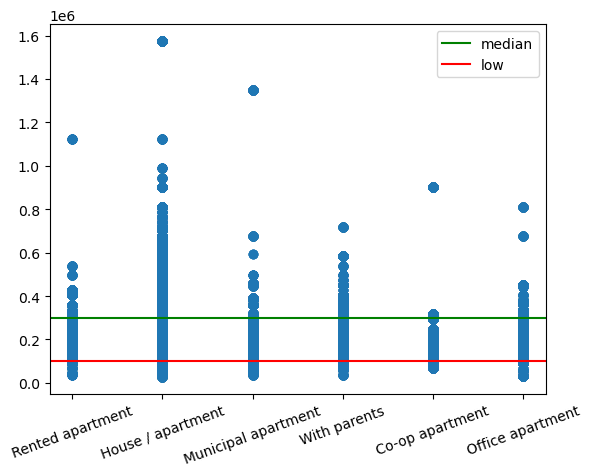

In [42]:
# 문제10:housing_type의 별로 income을 산포도로 나타내고 1000000, 3000000에 기준선을 만드세요.
import matplotlib.pyplot as plt
draw = df[["housing_type","income"]]
plt.scatter(draw.housing_type,draw.income)
plt.axhline(300000, c="g", label="median")
plt.axhline(100000, c="r", label="low")
plt.xticks(rotation=20)
plt.legend()
plt.savefig("10번.png")